# 03. Data Preprocessing

## Objective
- Clean the dataset
- Prepare the data for feature engineering

## 1. Setup and Load Dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

# Add project root to path
import os
import sys
sys.path.append(os.path.abspath('../'))
from src.data_loader import load_raw_data

# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 120)

print(f"✓ Python version: {sys.version.split()[0]}")
print(f"✓ Pandas version: {pd.__version__}")
print(f"✓ NumPy version: {np.__version__}")

✓ Python version: 3.10.11
✓ Pandas version: 2.1.4
✓ NumPy version: 1.26.4


In [2]:
# Load raw data using custom loader
try:
    df = load_raw_data()
    print(f"✓ Data loaded successfully")
    print(f"  Shape: {df.shape}")
    print(f"  Period: {df.index.min()} to {df.index.max()}")
    print(f"  Frequency: {df.index.freq if df.index.freq else 'Not set (likely 15min)'}")
except Exception as e:
    print(f"❌ Error: {e}")

👉 Loading: C:\EP16\Time Series Analysis and Forecasting\project\Electricity-Load-Diagrams\data\raw\electricity_data.parquet
✅ Data loaded successfully!
📊 Samples: 140256
👥 Number of customers: 370
🕒 Time span: 2011-01-01 00:15:00 → 2015-01-01 00:00:00
✓ Data loaded successfully
  Shape: (140256, 370)
  Period: 2011-01-01 00:15:00 to 2015-01-01 00:00:00
  Frequency: Not set (likely 15min)


## 2. Missing Value Handling
- The dataset contains no missing values. Therefore, forward fill or interpolation is not required.
- Even though there are no missing values, duplicates still needed to verified.

In [ ]:
# Check duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates if any
df = df.drop_duplicates()

Number of duplicate rows: 0


## 3. Outlier Analysis

In [10]:
# Z-score method
z_scores = (df - df.mean()) / df.std()
outliers = (np.abs(z_scores) > 3)

print("Number of detected outliers:")
print(outliers.sum().sum())

Number of detected outliers:
169423


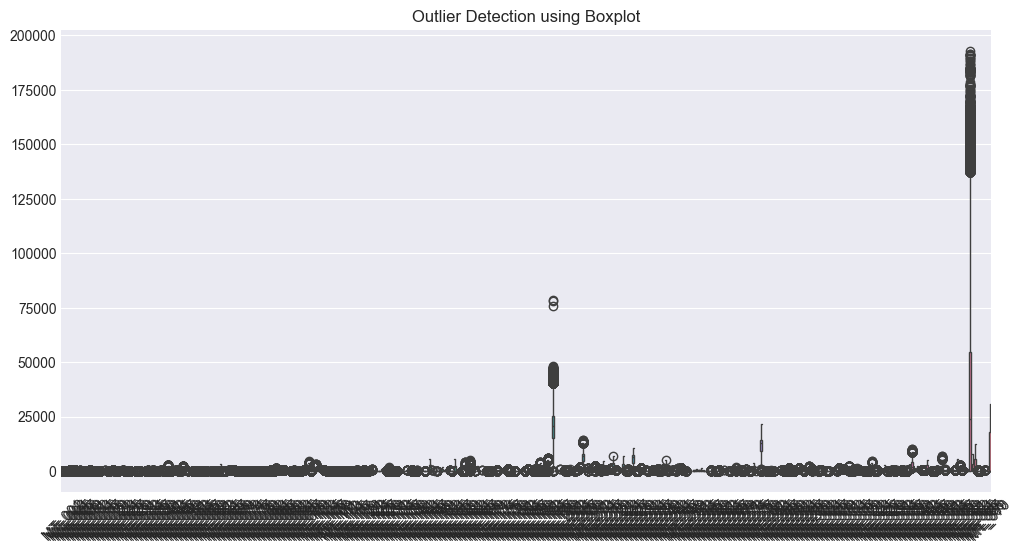

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Outlier Detection using Boxplot")
plt.xticks(rotation=45)
plt.show()

## 4. Time Index Processing

In [12]:
# Try setting 15-minute frequency
df = df.asfreq("15T")

print("Frequency after setting:", df.index.freq)

Frequency after setting: <15 * Minutes>


## 5. Scaling (If Needed)
- Standardization / Normalization
- Lý do lựa chọn

## 6. Train-Test Split Strategy
- Time-based split
- Tránh data leakage


## 7. Conclusion
- Dữ liệu sẵn sàng cho feature engineering